# Titanic example
What is the probability of surviving the Titanic?

In [1]:
import pandas as pd
import numpy as np

## Load data

In [2]:
training_data = pd.read_csv("/Users/davidtofan/LearningPython/Business Analytics – UEM/Artificial Intelligence/Titanic-Data/train.csv")

test_data = pd.read_csv("/Users/davidtofan/LearningPython/Business Analytics – UEM/Artificial Intelligence/Titanic-Data/test.csv")

target_data = pd.read_csv("/Users/davidtofan/LearningPython/Business Analytics – UEM/Artificial Intelligence/Titanic-Data/test_result.csv")

In [3]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Clean data

In [5]:
list(training_data.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
# Rename columns
training_data = training_data.rename(columns = {"Pclass": "PassageClass"})

test_data = test_data.rename(columns = {"Pclass": "PassageClass"})

In [7]:
training_data = training_data.rename(columns = {"Parch": "ParentsChildren"})

test_data = test_data.rename(columns = {"Parch": "ParentsChildren"})

In [8]:
training_data = training_data.rename(columns = {"SibSp": "SiblingsSpouses"})

test_data = test_data.rename(columns = {"SibSp": "SiblingsSpouses"})

In [9]:
training_data.head()

,PassengerId,Survived,PassageClass,Name,Sex,Age,SiblingsSpouses,ParentsChildren,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Drop unnecessary columns
training_data = training_data.drop(["Name", "Ticket", "Fare", "Cabin", "Embarked", "Age"], axis = 1)

test_data = test_data.drop(["Name", "Ticket", "Fare", "Cabin", "Embarked", "Age"], axis = 1)

In [11]:
training_data.head()

,PassengerId,Survived,PassageClass,Sex,SiblingsSpouses,ParentsChildren
0,1,0,3,male,1,0
1,2,1,1,female,1,0
2,3,1,3,female,0,0
3,4,1,1,female,1,0
4,5,0,3,male,0,0


## Codify data

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
training_data.iloc[:,3]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [14]:
test_data.iloc[:,2]

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

In [15]:
label_encoder_gender = LabelEncoder()

# Male = 0
# Female = 1

# all rows, fourth column
training_data.iloc[:,3] = label_encoder_gender.fit_transform(training_data.iloc[:,3])  # Converts Strings to numbers

test_data.iloc[:,2] = label_encoder_gender.fit_transform(test_data.iloc[:,2])  # Converts Strings to numbers

In [16]:
training_data.iloc[:,3]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [17]:
test_data.iloc[:,2]

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

In [18]:
# Review if it worked
training_data.head()

,PassengerId,Survived,PassageClass,Sex,SiblingsSpouses,ParentsChildren
0,1,0,3,1,1,0
1,2,1,1,0,1,0
2,3,1,3,0,0,0
3,4,1,1,0,1,0
4,5,0,3,1,0,0


In [19]:
# Review if it worked
test_data.head()

,PassengerId,PassageClass,Sex,SiblingsSpouses,ParentsChildren
0,892,3,1,0,0
1,893,3,0,1,0
2,894,2,1,0,0
3,895,3,1,0,0
4,896,3,0,1,1


## Prepare data for the model

In [20]:
# Training data // Inputs
X = training_data.iloc[:, [2,3,4,5]]  # all rows, those columns
# Training data should NOT include the Target data

# Target data // Outputs
d = training_data.iloc[:, [1]]  # all rows, second column

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()

# Transforms the data (normalizes)
X = sc.fit_transform(X)  # Training data
#d = sc.fit_transform(d)  # Do NOT transform, because it already represents 0 to 1

## Build the model

In [23]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [24]:
# Create our model
model = Sequential()  # built layers on top of it

# Number of inputs
inputs = len(X[0])

# INPUT LAYER
# Connects with 3 neurons/perceptrons, has 5 inputs, activation function
model.add(Dense(3, 
                input_dim = inputs, 
                activation = "relu", 
                kernel_initializer = "uniform"))
# HIDDEN LAYER
model.add(Dense(2, 
                activation = "relu", 
                kernel_initializer = "uniform"))

# OUTPUT LAYER
model.add(Dense(1, 
                activation = "sigmoid",
               kernel_initializer = "uniform"))

In [25]:
# Number of parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [26]:
from keras.optimizers import Adam

# Compile the model
model.compile(loss = "binary_crossentropy",  # For this case because the data is between 0 and 1
              optimizer = Adam(lr = 0.01),  # Learning rate
              metrics = ["accuracy"])  # 

### Train the model

In [27]:
# Train and optimize the model
trained_model = model.fit(X, d, epochs = 100)

Epoch 1/100
891/891 [==============================] - 0s 227us/step - loss: 0.6814 - accuracy: 0.6038
Epoch 2/100
891/891 [==============================] - 0s 75us/step - loss: 0.6693 - accuracy: 0.6162
Epoch 3/100
891/891 [==============================] - 0s 72us/step - loss: 0.6666 - accuracy: 0.6162
Epoch 4/100
891/891 [==============================] - 0s 66us/step - loss: 0.6660 - accuracy: 0.6162
Epoch 5/100
891/891 [==============================] - 0s 62us/step - loss: 0.6660 - accuracy: 0.6162
Epoch 6/100
891/891 [==============================] - 0s 57us/step - loss: 0.6660 - accuracy: 0.6162
Epoch 7/100
891/891 [==============================] - 0s 77us/step - loss: 0.6660 - accuracy: 0.6162
Epoch 8/100
891/891 [==============================] - 0s 72us/step - loss: 0.6663 - accuracy: 0.6162
Epoch 9/100
891/891 [==============================] - 0s 67us/step - loss: 0.6666 - accuracy: 0.6162
Epoch 10/100
891/891 [==============================] - 0s 60us/step - loss: 0.66

In [28]:
# Evaluate the training data
score, acc = model.evaluate(X, d)
print('Test Score:', score)
print('Test Accuracy: %.2f%%' % (acc * 100))

891/891 [==============================] - 0s 57us/step
Test Score: 0.6659121907386181
Test Accuracy: 61.62%


### Review the prediction of the model

In [29]:
# Predict the results of the training data
prediction = model.predict(X).round().tolist()
print(prediction)

[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]

In [30]:
# Visualize the predictions in a DataFrame
prediction = model.predict(X).tolist()

# Covert list to Series
se = pd.Series(prediction)

# Add new column of predictions in the DataFrame target_data
target_data['check'] = se

target_data['check'] = target_data['check'].str.get(0)  # Exctracts elements, converting to float
target_data

,PassengerId,Survived,check
0,892,0,0.384162
1,893,1,0.384162
2,894,0,0.384162
3,895,0,0.384162
4,896,1,0.384162
...,...,...,...
413,1305,0,0.384162
414,1306,1,0.384162
415,1307,0,0.384162
416,1308,0,0.384162


In [31]:
# Create a new column which summarizes (rounds) the predictions
Series = []
for val in target_data.check:
    if val >= 0.5:
        Series.append(1)
    else:
        Series.append(0)
        
# Add new column
target_data['final'] = Series
target_data

,PassengerId,Survived,check,final
0,892,0,0.384162,0
1,893,1,0.384162,0
2,894,0,0.384162,0
3,895,0,0.384162,0
4,896,1,0.384162,0
...,...,...,...,...
413,1305,0,0.384162,0
414,1306,1,0.384162,0
415,1307,0,0.384162,0
416,1308,0,0.384162,0


In [32]:
# Review how many predictions are correct
match = 0
nomatch = 0
for val in target_data.values:
    if val[1] == val[3]:
        match = match +1
    else:
        nomatch = nomatch +1
        
print("The MATCHED values for this case are:", match)
print("The UNMATCHED values for this case are:",nomatch)

The MATCHED values for this case are: 266
The UNMATCHED values for this case are: 152


In [33]:
# Evaluate the training data
score, acc = model.evaluate(X, d)
print('Score:', score)
print('Accuracy: %.2f%%' % (acc * 100))

891/891 [==============================] - 0s 38us/step
Score: 0.6659121907386181
Accuracy: 61.62%


## Visualization

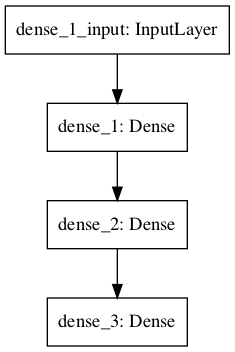

In [34]:
# Model Visualization
from keras.utils import plot_model

plot_model(model, to_file='model.png')

In [35]:
# Visualize the Neural Network
from ann_visualizer.visualize import ann_viz;

# Saves image as PDF
ann_viz(model, view = False, filename = "neural-network", title = "My Neural Network – Titanic")

In [36]:
import matplotlib.pyplot as plt

In [37]:
# x-axis = array of epochs (length of history)
# y = history of accuracy

epochs = range(1, len(trained_model.history["loss"]) + 1, 1)  # starting point, last point, steps

In [38]:
# Automating the chart data
historyKeys = list(trained_model.history.keys())

historyKeysLoss = historyKeys[0]
trained_model_Loss = trained_model.history[historyKeysLoss]  # "loss"

historyKeysMetrics = historyKeys[1]
trained_model_Metrics = trained_model.history[historyKeysMetrics]  # "accuracy"

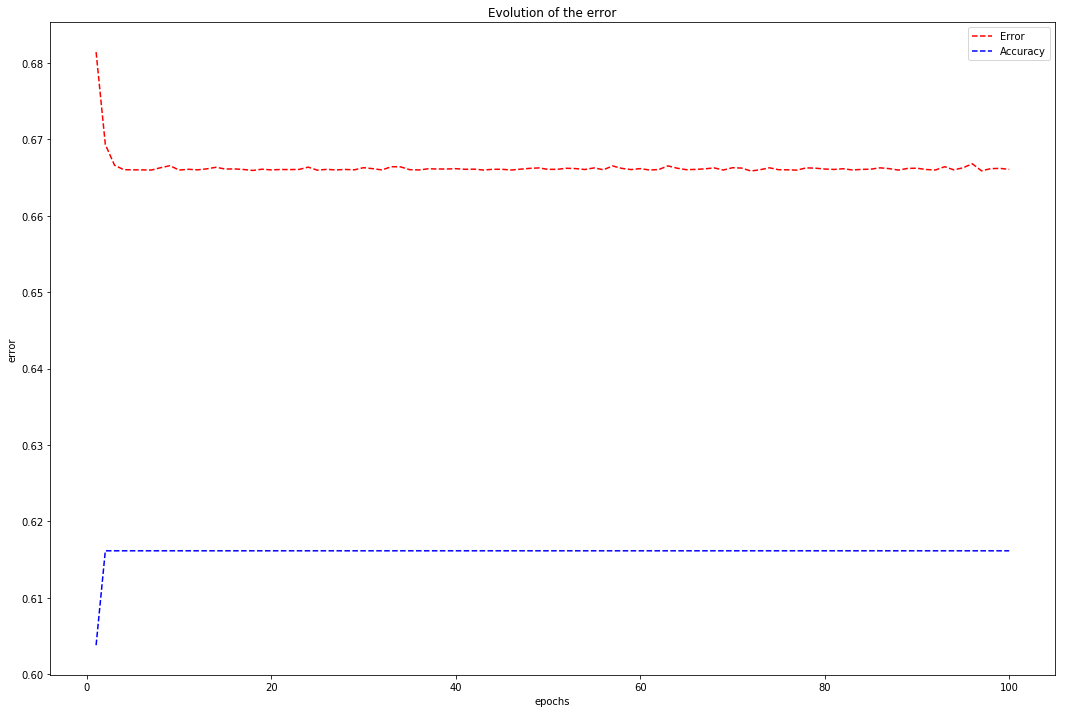

In [39]:
plt.figure(figsize = (18, 12))
plt.plot(epochs, trained_model_Loss, "r--", label = "Error")
plt.plot(epochs, trained_model_Metrics, "b--", label = "Accuracy")
plt.title("Evolution of the error")
plt.ylabel("error")
plt.xlabel("epochs")
plt.legend()  # show legend
plt.savefig('chart.png', dpi = 300, transparent = True)

## Save the model

In [40]:
model.save("MyNetworkTitanic.h5") 

## Predict a new case

In [41]:
# View how many variables the model accepts
X[0]
# PassageClass, Sex, SiblingsSpouses, ParentsChildren

array([ 0.82737724,  0.73769513,  0.43279337, -0.47367361])

In [42]:
# Create a new person/case (DataFrame)
# PassageClass, Sex, SiblingsSpouses, ParentsChildren
dicaprio = pd.DataFrame([3, "male", 0, 0]).T  # Transpose to create a new record (row)

# Male = 0
# Female = 1

dicaprio.iloc[:,1] = label_encoder_gender.transform(dicaprio.iloc[:,1])  # Converts Strings to numbers
dicaprio

,0,1,2,3
0,3,1,0,0


In [43]:
# Transform data (to normalize with the rest of the training data)
transformed_dicaprio = sc.transform(dicaprio)
transformed_dicaprio

array([[ 0.82737724,  0.73769513, -0.4745452 , -0.47367361]])

In [44]:
prediction_dicaprio = model.predict(transformed_dicaprio).tolist()

dicaprio["Check"] = pd.DataFrame(prediction_dicaprio[0], columns=["Check"])
dicaprio

,0,1,2,3,Check
0,3,1,0,0,0.384162


In [45]:
# Create a new column which summarizes (rounds) the predictions
Series = []
for val in dicaprio.Check:
    if val >= 0.5:
        Series.append(1)
    else:
        Series.append(0)


# Add new column
dicaprio['final'] = Series
dicaprio

,0,1,2,3,Check,final
0,3,1,0,0,0.384162,0
